# New Section

Minimum Probability of Error: 0.0393 at Gamma: 0.6333


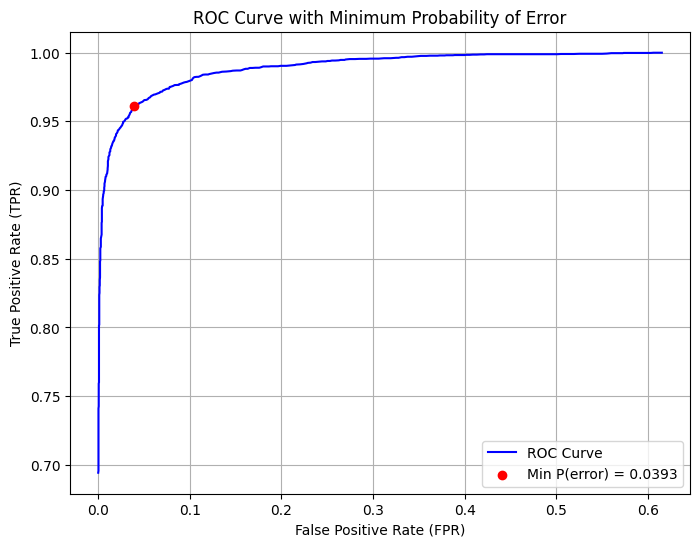

Theoretical Gamma: 0.5385
Empirical Gamma that minimizes P(error): 0.6333


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
prior_0 = 0.35
prior_1 = 0.65
gamma_initial = prior_0 / prior_1 # Renamed to avoid shadowing loop variable

# Means and covariances
m0 = np.array([-1, -1, -1, -1])
C0 = np.array([[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0,
0, 0, 2]])

m1 = np.array([1, 1, 1, 1])
C1 = np.array([[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0,
0, 3]])

N = 10000
num_samples_L0 = int(prior_0 * N)
num_samples_L1 = N - num_samples_L0
samples_L0 = np.random.multivariate_normal(m0, C0, num_samples_L0)
samples_L1 = np.random.multivariate_normal(m1, C1, num_samples_L1)

# Combine the samples into one dataset
x_samples_10k = np.vstack((samples_L0, samples_L1))
true_labels = np.hstack((np.zeros(num_samples_L0), np.ones(num_samples_L1)))

# Compute likelihoods for each sample
likelihoods_0 = multivariate_normal.pdf(x_samples_10k, mean=m0, cov=C0)
likelihoods_1 = multivariate_normal.pdf(x_samples_10k, mean=m1, cov=C1)

# Range of gamma values (thresholds)
gamma_values = np.logspace(-3, 3, 500)
TPR = []
FPR = []
P_D_0_given_L_1 = []
P_D_1_given_L_0 = []
P_error = []

for gamma in gamma_values:

    # Bayes decision rule: Decide L1 if likelihood_1 / likelihood_0 > gamma
    decisions = (likelihoods_1 / likelihoods_0) > gamma

    # Compute TP, FP, TN, FN
    TP = np.sum((decisions == 1) & (true_labels == 1))
    FP = np.sum((decisions == 1) & (true_labels == 0))
    TN = np.sum((decisions == 0) & (true_labels == 0))
    FN = np.sum((decisions == 0) & (true_labels == 1))

    # Calculate True Positive Rate (Sensitivity): P(D = 1 | L = 1)
    TPR.append(TP / (TP + FN))

    # Calculate False Positive Rate: P(D = 1 | L = 0)
    FPR.append(FP / (FP + TN))

    # Calculate False Negative Rate: P(D = 0 | L = 1)
    P_D_0_given_L_1.append(FN / (TP + FN))

    # False Positive Rate: P(D = 1 | L = 0) - This is the same as FPR
    P_D_1_given_L_0.append(FP / (FP + TN))

    # Calculate probability of error: P(error; gamma) = P(D=1|L=0)P(L=0) + P(D=0|L=1)P(L=1)
    error = P_D_1_given_L_0[-1] * prior_0 + P_D_0_given_L_1[-1] * prior_1
    P_error.append(error)

# Find the index of minimum P(error)
min_error_index = np.argmin(P_error)
min_error_gamma = gamma_values[min_error_index]
min_error = P_error[min_error_index]

# Print minimum error and the corresponding gamma (FIXED LINE)
print(f"Minimum Probability of Error: {min_error:.4f} at Gamma: {min_error_gamma:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, label="ROC Curve", color='blue')
plt.scatter(FPR[min_error_index], TPR[min_error_index], color='red',
label=f"Min P(error) = {min_error:.4f}", zorder=5)
plt.title("ROC Curve with Minimum Probability of Error")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.legend()
plt.show()

theoretical_gamma = prior_0 / prior_1
print(f"Theoretical Gamma: {theoretical_gamma:.4f}")
print(f"Empirical Gamma that minimizes P(error): {min_error_gamma:.4f}")

Minimum Probability of Error (Naive Bayes): 0.0460 at Gamma: 0.4066


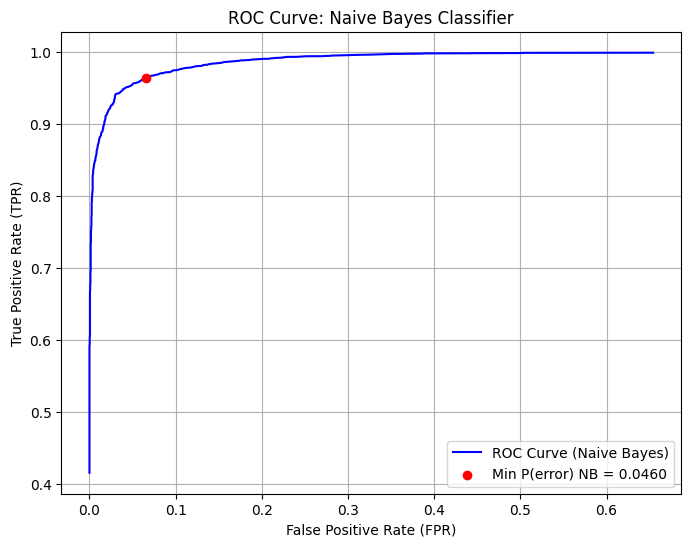

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
prior_0 = 0.35
prior_1 = 0.65
m0 = np.array([-1, -1, -1, -1])
m1 = np.array([1, 1, 1, 1])

C0 = np.array([[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0,
0, 0, 2]])
C1 = np.array([[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0,
0, 3]])

# Naive Bayes assumption: only diagonal elements (independence)
C0_nb = np.diag(np.diag(C0))
C1_nb = np.diag(np.diag(C1))

# Number of samples
N = 10000

# Generate samples based on the priors
num_samples_L0 = int(prior_0 * N)
num_samples_L1 = N - num_samples_L0

# Generate samples for each class
samples_L0 = np.random.multivariate_normal(m0, C0, num_samples_L0)
samples_L1 = np.random.multivariate_normal(m1, C1, num_samples_L1)

# Combine the samples into one dataset
x_samples_10k = np.vstack((samples_L0, samples_L1))
true_labels = np.hstack((np.zeros(num_samples_L0), np.ones(num_samples_L1)))

# Compute likelihoods under the Naive Bayes (diagonal covariance) assumption
likelihoods_0_nb = multivariate_normal.pdf(x_samples_10k, mean=m0, cov=C0_nb)
likelihoods_1_nb = multivariate_normal.pdf(x_samples_10k, mean=m1, cov=C1_nb)

gamma_values = np.logspace(-3, 3, 500)

# Initialize arrays to store TPR, FPR, and P(error) for Naive Bayes classifier
TPR_nb = []
FPR_nb = []
P_error_nb = []

# Loop over different gamma values to compute TPR, FPR, and error probabilities
for gamma in gamma_values:
    # Likelihood-ratio test for Naive Bayes classifier
    decisions_nb = (likelihoods_1_nb / likelihoods_0_nb) > gamma
    TP_nb = np.sum((decisions_nb == 1) & (true_labels == 1))   # True Positives
    FP_nb = np.sum((decisions_nb == 1) & (true_labels == 0))   # False Positives
    TN_nb = np.sum((decisions_nb == 0) & (true_labels == 0))   # True Negatives
    FN_nb = np.sum((decisions_nb == 0) & (true_labels == 1))   # False Negatives

    # Calculate TPR and FPR for Naive Bayes classifier
    # Note: Check for zero division before calculating ratios in a robust implementation,
    # but for this problem, the large sample size makes it unlikely.
    TPR_nb.append(TP_nb / (TP_nb + FN_nb))
    FPR_nb.append(FP_nb / (FP_nb + TN_nb))

    # Calculate P(error) for Naive Bayes classifier: P(error) = P(D=1|L=0)P(L=0) + P(D=0|L=1)P(L=1)
    P_D_1_given_L_0 = FP_nb / (FP_nb + TN_nb)
    P_D_0_given_L_1 = FN_nb / (TP_nb + FN_nb)
    P_error_nb.append(P_D_1_given_L_0 * prior_0 + P_D_0_given_L_1 * prior_1)

# Find the index of minimum P(error) for Naive Bayes classifier
min_error_index_nb = np.argmin(P_error_nb)

# Get the corresponding gamma value for Naive Bayes
min_error_gamma_nb = gamma_values[min_error_index_nb]

# Print minimum error and the corresponding gamma for Naive Bayes classifier
print(f"Minimum Probability of Error (Naive Bayes): {P_error_nb[min_error_index_nb]:.4f} at Gamma: {min_error_gamma_nb:.4f}")

# ROC Plot for Naive Bayes Classifier Only
plt.figure(figsize=(8, 6))
plt.plot(FPR_nb, TPR_nb, label="ROC Curve (Naive Bayes)", color='blue')
plt.scatter(FPR_nb[min_error_index_nb], TPR_nb[min_error_index_nb],
color='red', label=f"Min P(error) NB = {P_error_nb[min_error_index_nb]:.4f}",
zorder=5)
plt.title("ROC Curve: Naive Bayes Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.legend()
plt.show()

Practical Gamma: -5.5223, Minimum Error at practical: 0.3501
Ideal Threshold: -0.6190, Minimum Error at ideal: 0.4365


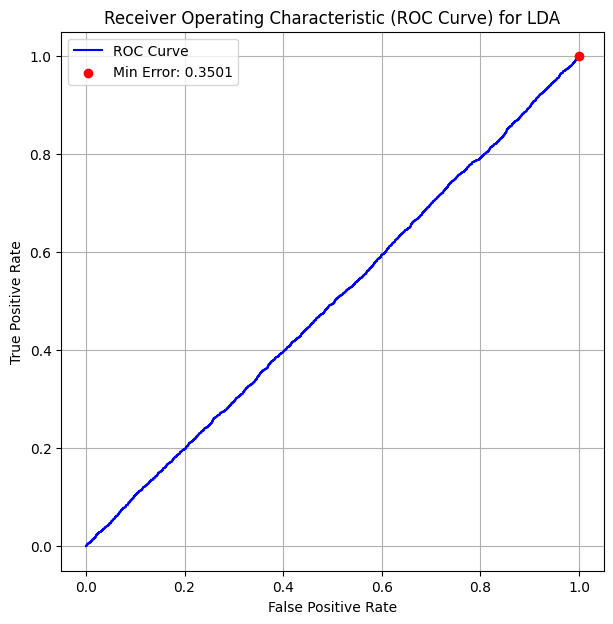

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.stats import multivariate_normal

# Setting options for output and plot
np.set_printoptions(threshold=np.inf)
plt.rcParams['figure.figsize'] = [7, 7]

num_features = 4
num_samples = 10000
num_classes = 2

# Mean vectors for the two classes
mean_vectors = np.ones((num_classes, num_features))
mean_vectors[0, :] = [-1, -1, -1, -1]
mean_vectors[1, :] = [1, 1, 1, 1]

cov_matrices = np.ones((num_classes, num_features, num_features))
cov_matrices[0] = [[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0],
[0, 0, 0, 2]]
cov_matrices[1]= [[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0,
0, 0, 3]]

np.random.seed(10)
priors = [0.35, 0.65]
sample_labels = (np.random.rand(num_samples) >= priors[1]).astype(int)

samples = np.zeros((num_samples, num_features))
for i in range(num_samples):
    if sample_labels[i] == 0:
        samples[i] = np.random.multivariate_normal(mean_vectors[0],
cov_matrices[0])
    else:
        samples[i] = np.random.multivariate_normal(mean_vectors[1],
cov_matrices[1])

# LDA Calculation
S_between = np.outer(mean_vectors[0] - mean_vectors[1], mean_vectors[0] -
mean_vectors[1])
S_within = cov_matrices[0] + cov_matrices[1]
# Solve generalized eigenvalue problem: S_between * w = lambda * S_within * w
eigenvals, eigenvecs = LA.eig(LA.inv(S_within).dot(S_between))
w_LDA = eigenvecs[:, np.argmax(eigenvals)]

# Project the samples onto the LDA vector
projected_class0 = samples[sample_labels == 0] @ w_LDA
projected_class1 = samples[sample_labels == 1] @ w_LDA

# Combine all projections and sort for threshold determination
all_projections = np.concatenate([projected_class0, projected_class1])
sorted_projections = np.sort(all_projections)
# Create thresholds between every pair of adjacent samples
thresholds = [(sorted_projections[i] + sorted_projections[i + 1]) / 2 for i in
range(len(sorted_projections) - 1)]
TPR_list = []
FPR_list = []
min_error_list = []

# Calculate TPR, FPR, and error rates for each threshold (tau)
for threshold in thresholds:
    # Decision is L1 if projection >= threshold
    decisions = all_projections >= threshold

    true_positives = np.sum((decisions == 1) & (sample_labels == 1))
    false_positives = np.sum((decisions == 1) & (sample_labels == 0))
    false_negatives = np.sum((decisions == 0) & (sample_labels == 1))
    true_negatives = np.sum((decisions == 0) & (sample_labels == 0))

    # FIX: Ternary operators must be on a single line or escaped
    TPR = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    FPR = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

    # Error: P(L0) * P(D=1|L=0) + P(L1) * P(D=0|L=1) = prior_0 * FPR + prior_1 * FNR
    error = priors[0] * FPR + priors[1] * (1 - TPR)

    TPR_list.append(TPR)
    FPR_list.append(FPR)
    min_error_list.append(error)

# The "Ideal" decision is based on the log-prior ratio, which is only optimal
# if the projected classes had equal variances, which is not true for LDA generally.
ideal_gamma = np.log(priors[0] / priors[1])
ideal_decision = all_projections >= ideal_gamma

TPR_ideal = np.sum((ideal_decision == 1) & (sample_labels == 1)) / np.sum(sample_labels == 1)
FPR_ideal = np.sum((ideal_decision == 1) & (sample_labels == 0)) / np.sum(sample_labels == 0)

# Compute the ideal minimum probability of error
min_error_ideal = priors[0] * FPR_ideal + priors[1] * (1 - TPR_ideal)

# Identify the practical minimum error from the threshold sweep
min_error_index = np.argmin(min_error_list)
print(f"Practical Gamma: {thresholds[min_error_index]:.4f}, Minimum Error at practical: {min_error_list[min_error_index]:.4f}")
# NOTE: The printout for "Gamma" is now the threshold (tau), not exp(tau)
print(f"Ideal Threshold: {ideal_gamma:.4f}, Minimum Error at ideal: {min_error_ideal:.4f}")

# Plotting the ROC Curve
plt.plot(FPR_list, TPR_list, label="ROC Curve", color='blue')
plt.scatter(FPR_list[min_error_index], TPR_list[min_error_index], color='red',
label=f'Min Error: {min_error_list[min_error_index]:.4f}', zorder=5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve) for LDA")
plt.grid(True)
plt.legend()
plt.show()

Minimum Expected Risk: 0.217298
Confusion Matrix (Normalized):
[[0.78499 0.10095 0.26142]
 [0.08391 0.77548 0.05618]
 [0.1311  0.12357 0.6824 ]]


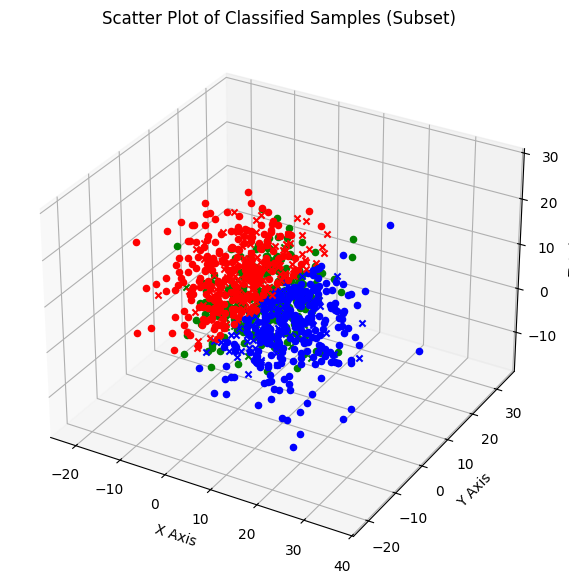

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for consistency
np.random.seed(42)
total_samples = 10000
num_classes = 3
num_features = 3
num_gaussians = 4

# Class prior probabilities
class_prior = np.array([0.3, 0.3, 0.4])

# Function to generate positive semi-definite covariance matrices
def generate_positive_definite_cov(dim, scale_factor=36):
    A = np.random.randn(dim, dim)
    cov_matrix = np.dot(A, A.T) + scale_factor * np.eye(dim)
    return cov_matrix

# Generate valid covariance matrices
cov_matrices = np.array([generate_positive_definite_cov(num_features) for _ in
range(num_gaussians)])

# Define mean vectors for the Gaussians
mean_vectors = np.array([[0, 0, 10], [0, 10, 0], [10, 0, 0], [10, 0, 10]])

# Generate sample labels based on the prior probabilities
rand_vals = np.random.rand(total_samples)
sample_labels = np.zeros(total_samples)
cum_priors = np.cumsum(class_prior)
for i in range(total_samples):
    if rand_vals[i] <= cum_priors[0]:
        sample_labels[i] = 0
    elif rand_vals[i] <= cum_priors[1]:
        sample_labels[i] = 1
    else:
        sample_labels[i] = 2

data_samples = np.zeros((total_samples, num_features))
for i in range(total_samples):
    if sample_labels[i] == 0:
        data_samples[i] = np.random.multivariate_normal(mean_vectors[0],
cov_matrices[0])
    elif sample_labels[i] == 1:
        data_samples[i] = np.random.multivariate_normal(mean_vectors[1],
cov_matrices[1])
    else:
        if np.random.rand() < 0.5:
            data_samples[i] = np.random.multivariate_normal(mean_vectors[2],
cov_matrices[2])
        else:
            data_samples[i] = np.random.multivariate_normal(mean_vectors[3],
cov_matrices[3])

loss_mat = np.ones((num_classes, num_classes)) - np.eye(num_classes)

class_likelihoods = np.zeros((num_classes, total_samples))
for cls_idx in range(num_classes):
    class_likelihoods[cls_idx, :] = mvn.pdf(data_samples,
mean=mean_vectors[cls_idx], cov=cov_matrices[cls_idx])

total_likelihood = np.matmul(class_prior, class_likelihoods)

# FIXED: Added parentheses to allow line continuation
posteriors = (class_likelihoods * class_prior[:, np.newaxis]) / total_likelihood
risk_values = np.matmul(loss_mat, posteriors)

decisions = np.argmin(risk_values, axis=0)

# Calculate the minimum expected risk
min_risk = np.sum(np.min(risk_values, axis=0)) / total_samples
print(f"Minimum Expected Risk: {min_risk:.6f}")

# Compute confusion matrix (normalized)
conf_matrix = np.zeros((num_classes, num_classes))
for predicted in range(num_classes):
    for actual in range(num_classes):
        conf_matrix[predicted, actual] = np.sum((decisions == predicted) &
(sample_labels == actual)) / np.sum(sample_labels == actual)

print("Confusion Matrix (Normalized):")
print(np.around(conf_matrix, decimals=5))
subset_indices = np.random.choice(total_samples, size=1000, replace=False)
data_subset = data_samples[subset_indices]
label_subset = sample_labels[subset_indices]
decision_subset = decisions[subset_indices]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']

for i in range(1000):
    ax.scatter(data_subset[i, 0], data_subset[i, 1], data_subset[i, 2],
    color=colors[int(decision_subset[i])], marker='o' if
    decision_subset[i] == label_subset[i] else 'x')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Scatter Plot of Classified Samples (Subset)')
plt.grid(True)
plt.show()

Confusion Matrix with Lambda_10 (Rows: Predicted, Columns: True Labels):
[[0.45627252 0.00589198 0.01002055]
 [0.12250246 0.9106383  0.004111  ]
 [0.42122502 0.08346972 0.98586845]]

Confusion Matrix with Lambda_100 (Rows: Predicted, Columns: True Labels):
[[1.07435310e-01 3.27332242e-04 2.56937307e-04]
 [5.37176548e-02 7.70867430e-01 5.13874615e-04]
 [8.38847036e-01 2.28805237e-01 9.99229188e-01]]

Error Rate with Lambda_10: 0.1988
Error Rate with Lambda_100: 0.3428


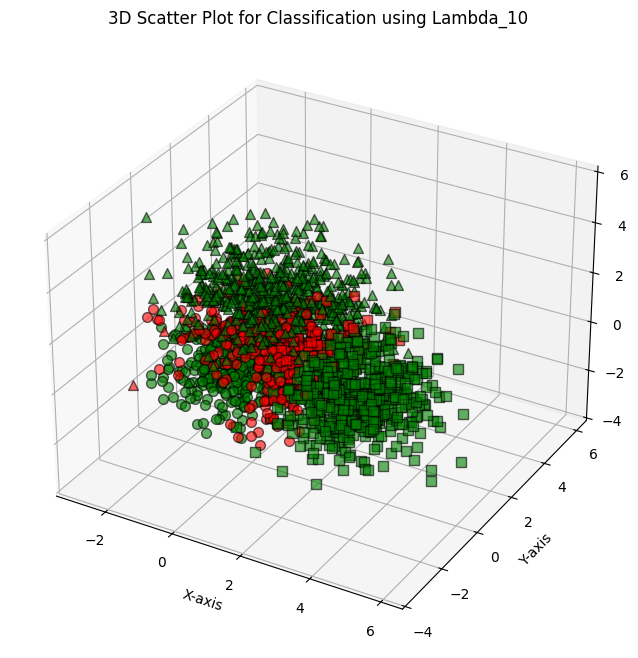

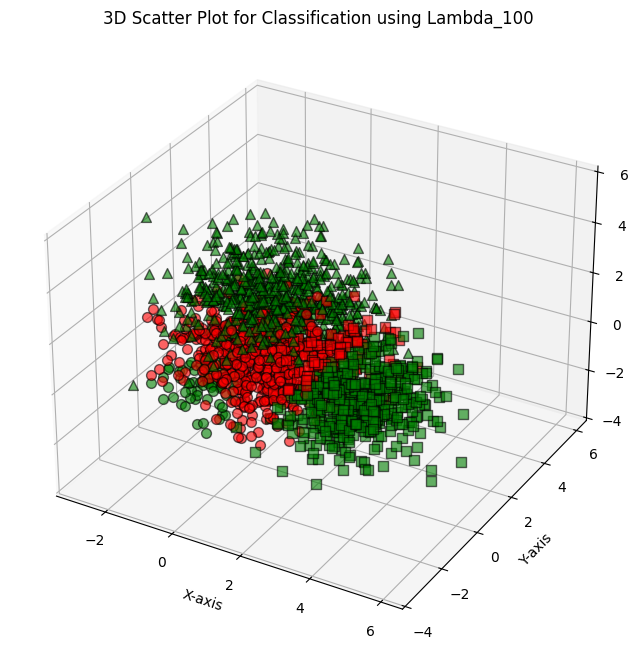

In [5]:
import numpy as np
from numpy.random import multivariate_normal
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
mu1 = np.array([0, 0, 0])
mu2 = np.array([3, 0, 0])
mu3 = np.array([0, 3, 0])
mu4 = np.array([0, 0, 3])

Sigma = np.eye(3)
priors = [0.3, 0.3, 0.4]
N = 10000
L = np.random.choice([1, 2, 3], size=N, p=priors)
# Initialize array to hold samples
X = np.zeros((N, 3))
# Generate samples based on class labels
for i in range(N):
    if L[i] == 1:
        X[i] = multivariate_normal(mu1, Sigma)
    elif L[i] == 2:
        X[i] = multivariate_normal(mu2, Sigma)
    elif L[i] == 3:
        # For Class 3, choose between mu3 and mu4 with equal probability
        if np.random.rand() < 0.5:
            X[i] = multivariate_normal(mu3, Sigma)
        else:
            X[i] = multivariate_normal(mu4, Sigma)

pdf1 = mvn(mean=mu1, cov=Sigma)
pdf2 = mvn(mean=mu2, cov=Sigma)
pdf3 = mvn(mean=mu3, cov=Sigma)
pdf4 = mvn(mean=mu4, cov=Sigma)

posterior_class_1 = priors[0] * pdf1.pdf(X)
posterior_class_2 = priors[1] * pdf2.pdf(X)
posterior_class_3 = priors[2] * (0.5 * pdf3.pdf(X) + 0.5 * pdf4.pdf(X))

# Combine posteriors into a single matrix (N samples x 3 classes)
posteriors = np.vstack([posterior_class_1, posterior_class_2,
posterior_class_3]).T

# Define loss matrices
Lambda_10 = np.array([[0, 10, 10], [1, 0, 10], [1, 1, 0]])
Lambda_100 = np.array([[0, 100, 100], [1, 0, 100], [1, 1, 0]])

# Function to compute the decision based on minimizing expected risk
def classify_min_expected_risk(posteriors, Lambda):
    N = posteriors.shape[0]
    decisions = np.zeros(N, dtype=int)
    for i in range(N):
        risks = np.dot(Lambda, posteriors[i])
        decisions[i] = np.argmin(risks) + 1  # +1 to match class labels 1, 2, 3
    return decisions

# Classify using Lambda_10
decisions_L10 = classify_min_expected_risk(posteriors, Lambda_10)

# Classify using Lambda_100
decisions_L100 = classify_min_expected_risk(posteriors, Lambda_100)

# Function to compute confusion matrix
def compute_confusion_matrix(true_labels, predicted_labels):
    confusion_matrix = np.zeros((3, 3))
    for true_label in [1, 2, 3]:
        for predicted_label in [1, 2, 3]:
            count = np.sum((true_labels == true_label) & (predicted_labels ==
predicted_label))
            confusion_matrix[predicted_label - 1, true_label - 1] = count
    return confusion_matrix / np.sum(confusion_matrix, axis=0)

# Compute confusion matrices
confusion_matrix_L10 = compute_confusion_matrix(L, decisions_L10)
confusion_matrix_L100 = compute_confusion_matrix(L, decisions_L100)

# Print confusion matrices
print("Confusion Matrix with Lambda_10 (Rows: Predicted, Columns: True Labels):")
print(confusion_matrix_L10)

print("\nConfusion Matrix with Lambda_100 (Rows: Predicted, Columns: True Labels):")
print(confusion_matrix_L100)

# Function to compute the error rate
def compute_error_rate(true_labels, predicted_labels):
    return np.mean(true_labels != predicted_labels)

# Compute error rates for Lambda_10 and Lambda_100
error_rate_L10 = compute_error_rate(L, decisions_L10)
error_rate_L100 = compute_error_rate(L, decisions_L100)

# Print the error rates
print(f"\nError Rate with Lambda_10: {error_rate_L10:.4f}")
print(f"Error Rate with Lambda_100: {error_rate_L100:.4f}")

# Visualization: plot minimum expected risk classifier results for Lambda_10
correct_L10 = (decisions_L10 == L)
correct_L100 = (decisions_L100 == L)

# Visualize using a subset of 2000 samples
idx = np.random.choice(N, size=2000, replace=False)
X_vis = X[idx]
L_vis = L[idx]
D_vis_L10 = decisions_L10[idx]
D_vis_L100 = decisions_L100[idx]
correct_vis_L10 = correct_L10[idx]
correct_vis_L100 = correct_L100[idx]

# Define marker shapes and colors for visualization
markers = {1: 'o', 2: 's', 3: '^'}
colors = {True: 'green', False: 'red'}

# Plot for Lambda_10
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X_vis)):
    xi = X_vis[i]
    ci = correct_vis_L10[i]
    ax.scatter(xi[0], xi[1], xi[2], marker=markers[L_vis[i]],
color=colors[ci], edgecolors='k', s=50, alpha=0.6)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Scatter Plot for Classification using Lambda_10')
plt.show()
# Plot for Lambda_100
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X_vis)):
  xi = X_vis[i]
  ci = correct_vis_L100[i]
  ax.scatter(xi[0], xi[1], xi[2], marker=markers[L_vis[i]],
color=colors[ci], edgecolors='k', s=50, alpha=0.6)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Scatter Plot for Classification using Lambda_100')
plt.show()

## Q2


--- Part A: Sample Generation Complete (10000 samples) ---

--- Part A: Classification Results (MAP/0-1 Loss) ---
1. Minimum Probability of Error (Estimated): 0.0448

2. Empirical Confusion Matrix P(D=d|L=l) (Rows: D, Columns: L):
[[9.435e-01 4.350e-02 3.940e-02 4.000e-04]
 [3.300e-02 9.486e-01 4.000e-04 1.160e-02]
 [2.320e-02 0.000e+00 9.542e-01 1.240e-02]
 [4.000e-04 7.900e-03 6.000e-03 9.755e-01]]
--------------------------------------------------



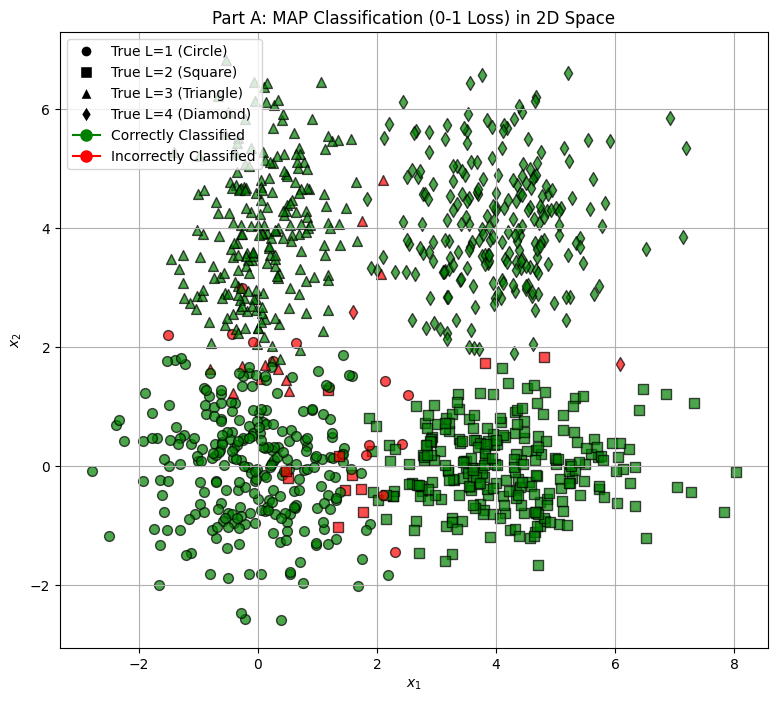

In [6]:
import numpy as np
from numpy.random import multivariate_normal
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set random seed for reproducibility
np.random.seed(42)

# --- A.1. Setup and Sample Generation ---

N = 10000  # Number of samples
K = 4      # Number of classes
priors = np.array([0.25, 0.25, 0.25, 0.25])  # All priors are 0.25

# Chosen 2D Gaussian parameters
mu = {
    1: np.array([0, 0]), 2: np.array([4, 0]),
    3: np.array([0, 4]), 4: np.array([4, 4])
}
Sigma = {
    1: np.array([[1.0, 0.0], [0.0, 1.0]]),
    2: np.array([[1.5, 0.0], [0.0, 0.5]]),
    3: np.array([[0.5, 0.0], [0.0, 1.5]]),
    4: np.array([[1.0, 0.0], [0.0, 1.0]])
}

# Generate true labels L
L = np.random.choice(range(1, K + 1), size=N, p=priors)
# Initialize array to hold samples X
X = np.zeros((N, 2))
# Generate samples based on class labels
for i in range(N):
    k = L[i]
    X[i] = multivariate_normal(mu[k], Sigma[k])

print(f"--- Part A: Sample Generation Complete ({N} samples) ---\n")

# --- A.2. MAP Classifier Implementation and Confusion Matrix ---

# Instantiate the class-conditional PDFs
pdf = {k: mvn(mean=mu[k], cov=Sigma[k]) for k in range(1, K + 1)}

# Calculate Likelihoods: P(x|L=j)
likelihoods = np.zeros((N, K))
for j in range(1, K + 1):
    likelihoods[:, j - 1] = pdf[j].pdf(X)

# MAP Decision Rule (Minimum Probability of Error):
# d(x) = argmax_j P(x|L=j) * P(L=j)
# Since P(L=j) is constant (0.25), this is equivalent to argmax_j P(x|L=j)
D_map = np.argmax(likelihoods, axis=1) + 1  # +1 for 1-based indexing

# 2. Count samples for empirical confusion matrix (D vs L)
confusion_matrix_map = np.zeros((K, K), dtype=int)
for i in range(N):
    # Rows: Decided (D_map[i] - 1), Columns: True (L[i] - 1)
    confusion_matrix_map[D_map[i] - 1, L[i] - 1] += 1

# Normalize to get P(D=d|L=l) (each column sums to 1)
empirical_confusion_map = confusion_matrix_map / np.sum(confusion_matrix_map, axis=0)

# Estimate Minimum Probability of Error
error_map = np.mean(L != D_map)

print(f"--- Part A: Classification Results (MAP/0-1 Loss) ---")
print(f"1. Minimum Probability of Error (Estimated): {error_map:.4f}")
print("\n2. Empirical Confusion Matrix P(D=d|L=l) (Rows: D, Columns: L):\n"
      f"{empirical_confusion_map.round(4)}")
print("--------------------------------------------------\n")


# --- A.3. Visualization (2D Scatter Plot) ---

correct_map = (D_map == L)

# Define marker shapes (for True Class L) and colors (for Correctness)
markers = {1: 'o', 2: 's', 3: '^', 4: 'd'}
colors = {True: 'green', False: 'red'}

# Use a subset of 1000 samples for clearer visualization
idx = np.random.choice(N, size=1000, replace=False)
X_vis = X[idx]
L_vis = L[idx]
correct_vis_map = correct_map[idx]

plt.figure(figsize=(10, 8))
for i in range(len(X_vis)):
    xi = X_vis[i]
    ci = correct_vis_map[i]
    # Scatter plot: marker=True Class (L), color=Correctness (D==L)
    plt.scatter(xi[0], xi[1], marker=markers[L_vis[i]],
                color=colors[ci], edgecolors='k', s=50, alpha=0.7)

# Create custom legend handles for clarity
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='True L=1 (Circle)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='True L=2 (Square)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='True L=3 (Triangle)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='d', color='w', label='True L=4 (Diamond)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='o', color='green', label='Correctly Classified',
           markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='red', label='Incorrectly Classified',
           markerfacecolor='red', markersize=8),
]

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Part A: MAP Classification (0-1 Loss) in 2D Space')
plt.legend(handles=legend_elements, loc='upper left')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

--- Part B: ERM Classification Results ---
Loss Matrix (Lambda):
[[  0  10  10 100]
 [  1   0  10 100]
 [  1   1   0 100]
 [  1   1   1   0]]

Using sample average over the 10000 samples, the estimated minimum expected risk is:
Estimated Minimum Expected Risk: 0.2153
------------------------------------------
Empirical Confusion Matrix P(D=d|L=l) for ERM (Rows: D, Columns: L):
[[7.515e-01 8.300e-03 8.000e-03 0.000e+00]
 [1.080e-01 8.774e-01 1.200e-03 4.000e-04]
 [1.091e-01 1.200e-03 8.750e-01 1.700e-03]
 [3.140e-02 1.131e-01 1.159e-01 9.979e-01]]


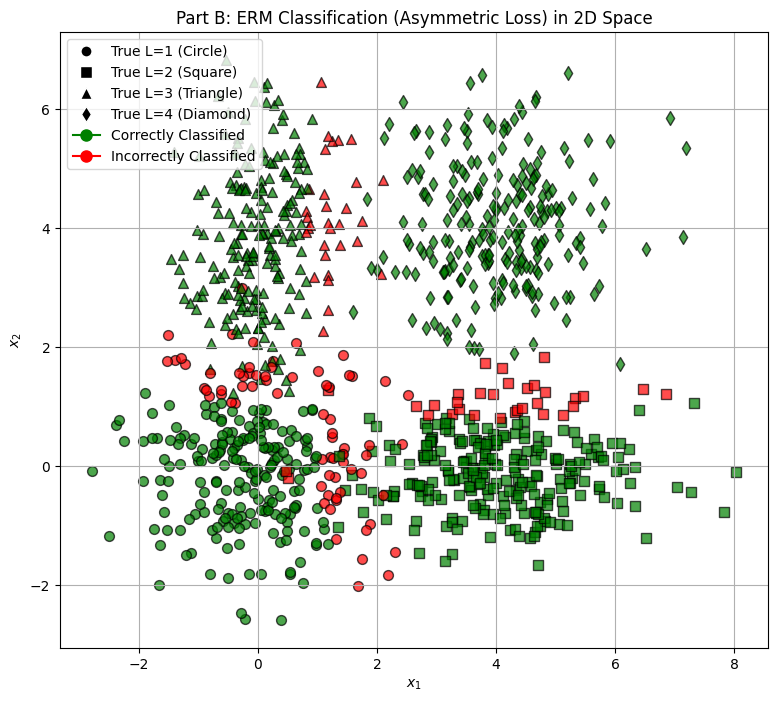

In [7]:
import numpy as np
from numpy.random import multivariate_normal
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Setup Parameters and Data (from Part A & B previous turns) ---
np.random.seed(42)
N = 10000
K = 4
priors = np.array([0.25, 0.25, 0.25, 0.25])

# Gaussian Parameters (Used to generate X and calculate likelihoods)
mu = {1: np.array([0, 0]), 2: np.array([4, 0]), 3: np.array([0, 4]), 4: np.array([4, 4])}
Sigma = {
    1: np.array([[1.0, 0.0], [0.0, 1.0]]),
    2: np.array([[1.5, 0.0], [0.0, 0.5]]),
    3: np.array([[0.5, 0.0], [0.0, 1.5]]),
    4: np.array([[1.0, 0.0], [0.0, 1.0]])
}

# Re-generate samples and calculate likelihoods (same as Part A)
L = np.random.choice(range(1, K + 1), size=N, p=priors)
X = np.zeros((N, 2))
for i in range(N):
    k = L[i]
    X[i] = multivariate_normal(mu[k], Sigma[k])

pdf = {k: mvn(mean=mu[k], cov=Sigma[k]) for k in range(1, K + 1)}
likelihoods = np.zeros((N, K))
for j in range(1, K + 1):
    likelihoods[:, j - 1] = pdf[j].pdf(X)

# Un-normalized Posteriors: P(x|L=j) * P(L=j)
unnormalized_posteriors = likelihoods * priors

# --- Part B: ERM Classification ---
Lambda = np.array([
    [0, 10, 10, 100],
    [1, 0, 10, 100],
    [1, 1, 0, 100],
    [1, 1, 1, 0]
])

def classify_min_expected_risk(unnormalized_posteriors, Lambda):
    N_samples = unnormalized_posteriors.shape[0]
    decisions = np.zeros(N_samples, dtype=int)
    for i in range(N_samples):
        risks_unnormalized = np.dot(Lambda, unnormalized_posteriors[i])
        decisions[i] = np.argmin(risks_unnormalized) + 1 # +1 for 1-based class labels
    return decisions

D_erm = classify_min_expected_risk(unnormalized_posteriors, Lambda)

# Estimate Minimum Expected Risk
risk_erm_sum = 0
for i in range(N):
    risk_erm_sum += Lambda[D_erm[i] - 1, L[i] - 1]

min_expected_risk = risk_erm_sum / N

# Optional: Display the new empirical confusion matrix (P(D=d|L=l)) for context
confusion_matrix_erm = np.zeros((K, K), dtype=int)
for i in range(N):
    confusion_matrix_erm[D_erm[i] - 1, L[i] - 1] += 1
empirical_confusion_erm = confusion_matrix_erm / np.sum(confusion_matrix_erm, axis=0)

# --- Results Output ---
print(f"--- Part B: ERM Classification Results ---")
print(f"Loss Matrix (Lambda):\n{Lambda}")
print(f"\nUsing sample average over the {N} samples, the estimated minimum expected risk is:")
print(f"Estimated Minimum Expected Risk: {min_expected_risk:.4f}")
print("------------------------------------------")
print(f"Empirical Confusion Matrix P(D=d|L=l) for ERM (Rows: D, Columns: L):\n{empirical_confusion_erm.round(4)}")

# --- Visualization Setup (for plot below) ---
correct_erm = (D_erm == L)
markers = {1: 'o', 2: 's', 3: '^', 4: 'd'}
colors = {True: 'green', False: 'red'}
idx = np.random.choice(N, size=1000, replace=False)
X_vis = X[idx]
L_vis = L[idx]
correct_vis_erm = correct_erm[idx]

plt.figure(figsize=(10, 8))
for i in range(len(X_vis)):
    xi = X_vis[i]
    ci = correct_vis_erm[i]
    plt.scatter(xi[0], xi[1], marker=markers[L_vis[i]],
                color=colors[ci], edgecolors='k', s=50, alpha=0.7)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='True L=1 (Circle)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='True L=2 (Square)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='True L=3 (Triangle)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='d', color='w', label='True L=4 (Diamond)',
           markerfacecolor='k', markersize=8),
    Line2D([0], [0], marker='o', color='green', label='Correctly Classified',
           markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='red', label='Incorrectly Classified',
           markerfacecolor='red', markersize=8),
]

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Part B: ERM Classification (Asymmetric Loss) in 2D Space')
plt.legend(handles=legend_elements, loc='upper left')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

**Q3**


Error Rate: 0.693548

Confusion Matrix (Rows: True Labels, Columns: Predicted Labels):
[[   4    0    3    8    4    1    0]
 [   2    0   11   76   74    0    0]
 [   1    1   73  615  762    3    2]
 [   1    0   45  640 1507    5    0]
 [   0    0    2   93  779    6    0]
 [   0    0    0   27  143    5    0]
 [   0    0    0    0    5    0    0]]

Normalized Confusion Matrix:
[[0.2  0.   0.15 0.4  0.2  0.05 0.  ]
 [0.01 0.   0.07 0.47 0.45 0.   0.  ]
 [0.   0.   0.05 0.42 0.52 0.   0.  ]
 [0.   0.   0.02 0.29 0.69 0.   0.  ]
 [0.   0.   0.   0.11 0.89 0.01 0.  ]
 [0.   0.   0.   0.15 0.82 0.03 0.  ]
 [0.   0.   0.   0.   1.   0.   0.  ]]


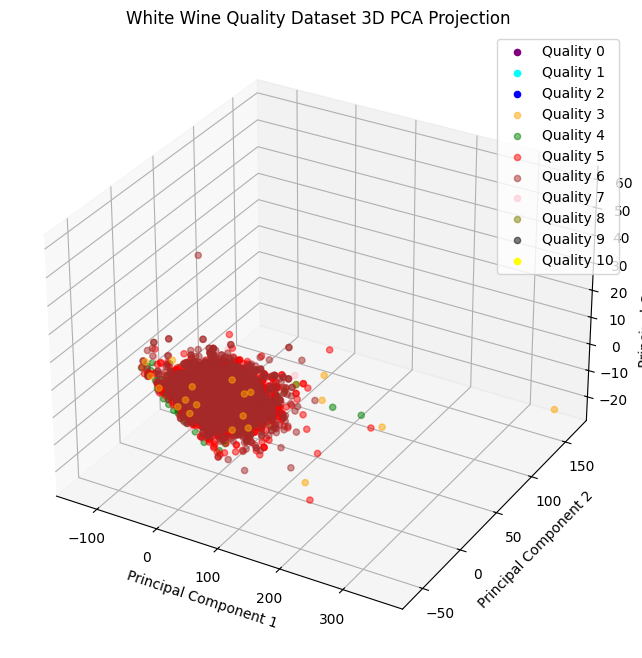

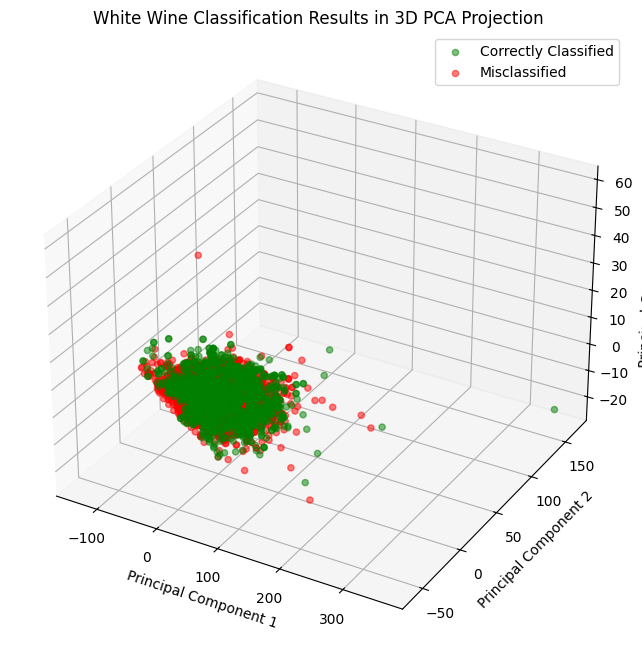

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

white_wine = pd.read_csv('/content/winequality-white.csv', sep=';')

# Features and labels
X = white_wine.drop('quality', axis=1).values
y = white_wine['quality'].values
classes = np.unique(y)
all_classes = np.arange(11)

# Estimate class priors
N = len(y)
class_counts = Counter(y)
class_priors = {cls: count / N for cls, count in class_counts.items()}

# Estimate mean vectors and covariance matrices
class_means = {}
class_covs = {}
d = X.shape[1]
alpha = 0.01

for cls in classes:
    X_cls = X[y == cls]
    mean_vector = np.mean(X_cls, axis=0)
    cov_matrix = np.cov(X_cls, rowvar=False)
    # Regularize covariance matrix
    lambda_reg = alpha * np.trace(cov_matrix) / d
    cov_matrix += lambda_reg * np.eye(d)
    class_means[cls] = mean_vector
    class_covs[cls] = cov_matrix

# Implement the classifier
N = X.shape[0]
y_pred = np.zeros(N)
mvns = {}
for cls in classes:
    mvns[cls] = multivariate_normal(mean=class_means[cls],
cov=class_covs[cls])

for i in range(N):
    x_i = X[i]
    posteriors = {}
    for cls in classes:
        prior = class_priors[cls]
        likelihood = mvns[cls].pdf(x_i)
        posteriors[cls] = prior * likelihood
    y_pred[i] = max(posteriors, key=posteriors.get)
num_errors = np.sum(y_pred != y)
error_rate = num_errors / N
print(f"\nError Rate: {error_rate:.6f}")

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred, labels=classes)
print("\nConfusion Matrix (Rows: True Labels, Columns: Predicted Labels):")
print(conf_matrix)

# Normalized confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:,
np.newaxis]
print("\nNormalized Confusion Matrix:")
print(np.around(conf_matrix_norm, decimals=2))

# PCA for 3D Visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
colors = {
    0: 'purple',
    1: 'cyan',
    2: 'blue',
    3: 'orange',
    4: 'green',
    5: 'red',
    6: 'brown',
    7: 'pink',
    8: 'olive',
    9: 'black',
    10: 'yellow'
}

# 3D Scatter Plot for Data Distribution by Class
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
for cls in all_classes:
    idx = y == cls

    if np.any(idx):
        ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2],
label=f'Quality {cls}', color=colors[cls], alpha=0.5)
    else:
        ax.scatter([], [], [], label=f'Quality {cls}', color=colors[cls])

handles, labels = ax.get_legend_handles_labels()
quality_to_handle_label = {int(label.split()[1]): (handle, label) for handle,
label in zip(handles, labels)}
desired_order = np.arange(11)
ordered_handles_labels = [quality_to_handle_label[cls] for cls in
desired_order if cls in quality_to_handle_label]
ordered_handles, ordered_labels = zip(*ordered_handles_labels)
ax.legend(ordered_handles, ordered_labels)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('White Wine Quality Dataset 3D PCA Projection')
plt.show()

# Classification results plot
correct = y_pred == y
incorrect = ~correct

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[correct, 0], X_pca[correct, 1], X_pca[correct, 2],
color='green', alpha=0.5, label='Correctly Classified')
ax.scatter(X_pca[incorrect, 0], X_pca[incorrect, 1], X_pca[incorrect, 2],
color='red', alpha=0.5, label='Misclassified')

# Legend adjustments for classification
handles, labels = ax.get_legend_handles_labels()
ordered_labels = ['Correctly Classified', 'Misclassified']
ordered_handles = [handles[labels.index(label)] for label in ordered_labels if
label in labels]
ax.legend(ordered_handles, ordered_labels)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('White Wine Classification Results in 3D PCA Projection')
plt.show()


Class Priors:
Class 1: 0.1672
Class 2: 0.1499
Class 3: 0.1365
Class 4: 0.1725
Class 5: 0.1851
Class 6: 0.1888

Error Rate: 0.033401

Confusion Matrix:
[[1722    0    0    0    0    0]
 [   0 1544    0    0    0    0]
 [   0   39 1367    0    0    0]
 [   0    0    0 1472  305    0]
 [   0    0    0    0 1906    0]
 [   0    0    0    0    0 1944]]

Normalized Confusion Matrix:
[[1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   0.03 0.97 0.   0.   0.  ]
 [0.   0.   0.   0.83 0.17 0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


/tmp/ipython-input-3185805119.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', len(classes))


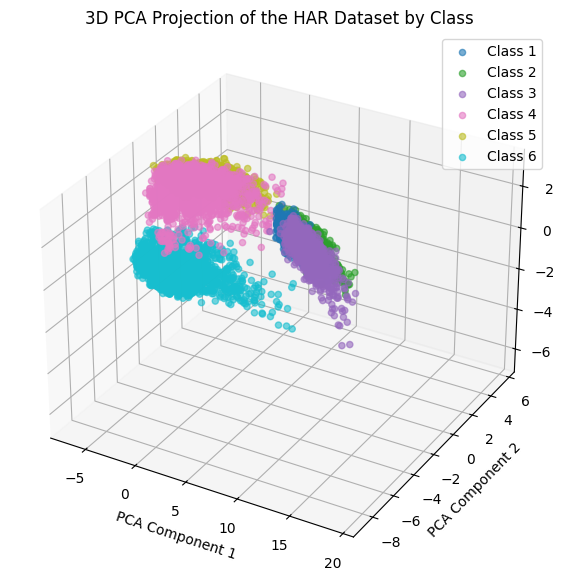

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Load training and test datasets
X_train = pd.read_csv(r'/content/X_train.txt', sep=r'\s+', header=None)
y_train = pd.read_csv(r'/content/y_train.txt', header=None)

X_test = pd.read_csv(r'/content/X_test.txt', sep=r'\s+', header=None)
y_test = pd.read_csv(r'/content/y_test.txt', header=None)

# Combine training and test data
X = pd.concat([X_train, X_test], ignore_index=True).values
y = pd.concat([y_train, y_test], ignore_index=True).values.ravel()
classes = np.unique(y)

# Estimate class priors
N = len(y)
class_counts = Counter(y)
class_priors = {cls: count / N for cls, count in class_counts.items()}

print("\nClass Priors:")
for cls in sorted(class_priors):
    print(f"Class {cls}: {class_priors[cls]:.4f}")
means = {}
cov_matrices = {}
alpha = 0.01

for cls in classes:
    X_cls = X[y == cls]
    mean_vector = np.mean(X_cls, axis=0)
    cov_matrix = np.cov(X_cls, rowvar=False)

    # Regularization of the covariance matrix
    d = X_cls.shape[1]
    lambda_reg = alpha * np.trace(cov_matrix) / d
    cov_matrix += lambda_reg * np.eye(d)

    means[cls] = mean_vector
    cov_matrices[cls] = cov_matrix

y_pred = np.zeros(N)

gaussian_models = {}
for cls in classes:
    gaussian_models[cls] = multivariate_normal(mean=means[cls],
cov=cov_matrices[cls])

for i in range(N):
    x = X[i]
    log_posteriors = {}

    for cls in classes:
        log_prior = np.log(class_priors[cls])
        log_likelihood = gaussian_models[cls].logpdf(x)
        log_posteriors[cls] = log_prior + log_likelihood

    y_pred[i] = max(log_posteriors, key=log_posteriors.get)

# Calculate and print the error rate
error_rate = 1 - np.mean(y_pred == y)
print(f"\nError Rate: {error_rate:.6f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred, labels=classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Normalized Confusion Matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:,
np.newaxis]
print("\nNormalized Confusion Matrix:")
print(np.around(conf_matrix_norm, decimals=2))

# PCA for visualization (3D projection)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colormap = cm.get_cmap('tab10', len(classes))
# Plot the data with different colors for each class
for i, cls in enumerate(classes):
  idx_class = y == cls
  # Plot points for each class (regardless of correct or misclassified)
  ax.scatter(X_pca[idx_class, 0], X_pca[idx_class, 1], X_pca[idx_class, 2],
color=colormap(i), label=f'Class {cls}', alpha=0.6)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Projection of the HAR Dataset by Class')
# Show legend with only class labels
plt.legend(loc='best')
# Display the plot
plt.show()